This is the implementation of supervised learning using the Support Vector Machines model for the traffic prediction dataset.

In [4]:
import pandas as pd

# first I am loading the data

trafficData = pd.read_csv("TrafficTwoMonth.csv")
# after loading the data I am going to familiarize with the data
print("Calling the head() method on the traffic data:\n")
trafficData.head()

Calling the head() method on the traffic data:



,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


From this we see that data contains 9 columns.

In [5]:
# to obtain more information on data: 
print("Printing the data information:\n")
print(trafficData.info())

Printing the data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB
None


From the above displayed information we understand that the traffic data contains 9 columns and 5952 rows. There are no null values in any of the cells. The data types for each column (feature) are 3 objects and 6 integers.

In [6]:
# to obtain even further information I will be using the describe() method for traffic data

print("Printing the data description:\n")
print(trafficData.describe())

Printing the data description:

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  5952.000000  5952.000000  5952.000000  5952.000000  5952.000000   
mean     16.000000    65.440692    12.161458    12.912970    18.646337   
std       8.945023    44.749335    11.537944    12.497736    10.973139   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.750000     3.000000     2.000000    10.000000   
50%      16.000000    62.000000     9.000000    10.000000    18.000000   
75%      24.000000   103.000000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  5952.000000  
mean    109.161458  
std      55.996312  
min      21.000000  
25%      54.000000  
50%     104.000000  
75%     153.000000  
max     279.000000  


Next I am visualizing the data to obtain a deeper understanding of it and possibly detecting any patterns

Text(0, 0.5, 'Total nr of vehicles')

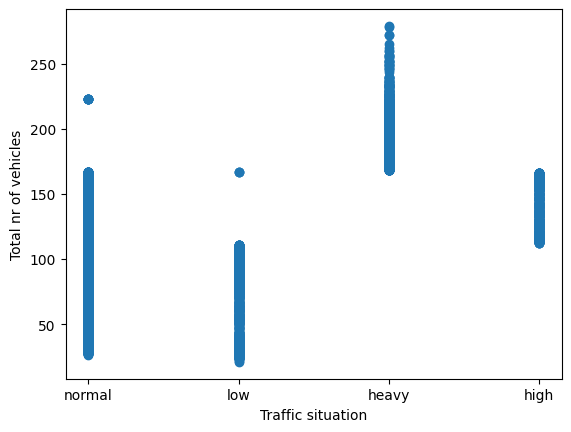

In [7]:
# how does the total nr of vehicles affect traffic

from matplotlib import pyplot as plt

plt.scatter(trafficData.iloc[:,-1],trafficData.iloc[:,-2])
plt.xlabel("Traffic situation")
plt.ylabel("Total nr of vehicles")


Text(0, 0.5, 'Total nr of cars')

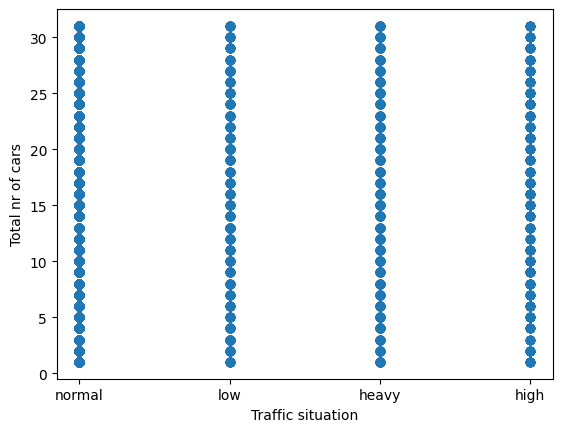

In [8]:
# how does the nr of cars affect traffic

from matplotlib import pyplot as plt

plt.scatter(trafficData.iloc[:,-1],trafficData.iloc[:,1])
plt.xlabel("Traffic situation")
plt.ylabel("Total nr of cars")

Text(0, 0.5, 'Total nr of bikes')

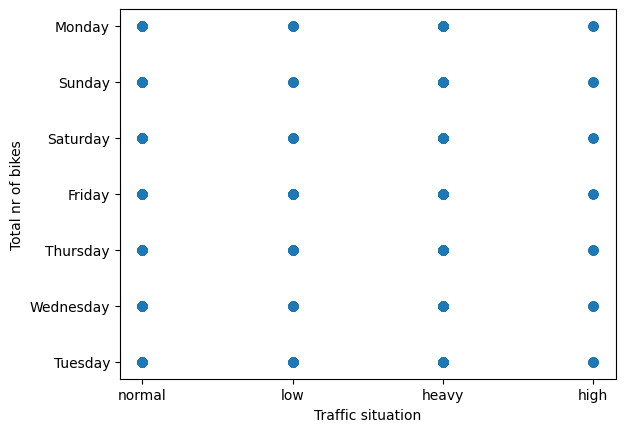

In [9]:
# how does the nr of bikes affect traffic

from matplotlib import pyplot as plt

plt.scatter(trafficData.iloc[:,-1],trafficData.iloc[:,2])
plt.xlabel("Traffic situation")
plt.ylabel("Total nr of bikes")

Text(0, 0.5, 'Total nr of buses')

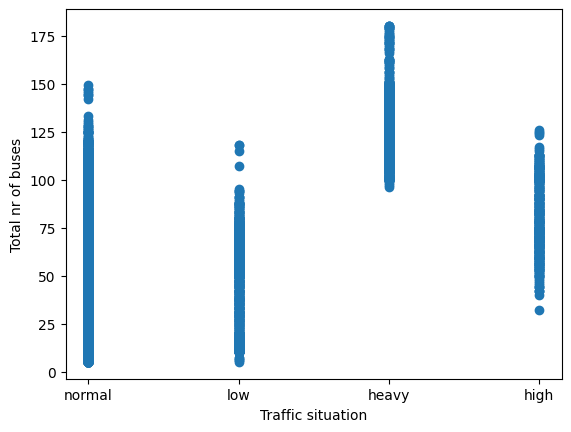

In [10]:
# how does the nr of buses affect traffic

from matplotlib import pyplot as plt

plt.scatter(trafficData.iloc[:,-1],trafficData.iloc[:,3])
plt.xlabel("Traffic situation")
plt.ylabel("Total nr of buses")

Text(0, 0.5, 'Total nr of trucks')

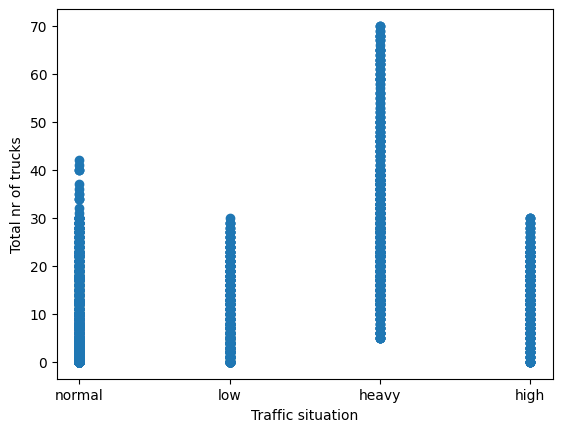

In [11]:
# how does the nr of trucks affect traffic

from matplotlib import pyplot as plt

plt.scatter(trafficData.iloc[:,-1],trafficData.iloc[:,4])
plt.xlabel("Traffic situation")
plt.ylabel("Total nr of trucks")

In [12]:
# in order for the time column to be more meaningful I am going to convert it into hour, minute and am/pm
trafficData['Hour'] = pd.to_datetime(trafficData['Time']).dt.hour
trafficData['Minute'] = pd.to_datetime(trafficData['Time']).dt.minute

trafficData['AM/PM'] = trafficData['Time'].apply(lambda x:x.split(' ')[1])
trafficData['AM/PM'] = trafficData['AM/PM'].replace({"AM":0,"PM":1})


trafficData = trafficData.drop(columns=['Time'], axis=1)
trafficData.head()


/var/folders/p6/cqrq1pln5m7_p59dpvj1s5pr0000gn/T/ipykernel_20088/760646362.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trafficData['Hour'] = pd.to_datetime(trafficData['Time']).dt.hour
/var/folders/p6/cqrq1pln5m7_p59dpvj1s5pr0000gn/T/ipykernel_20088/760646362.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  trafficData['Minute'] = pd.to_datetime(trafficData['Time']).dt.minute


,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM/PM
0,10,Tuesday,13,2,2,24,41,normal,0,0,0
1,10,Tuesday,14,1,1,36,52,normal,0,15,0
2,10,Tuesday,10,2,2,32,46,normal,0,30,0
3,10,Tuesday,10,2,2,36,50,normal,0,45,0
4,10,Tuesday,11,2,1,34,48,normal,1,0,0


In [13]:
# in order to work with numbers now I will be replacing the days of the week with their corresponding order numbers
trafficData['Day of the week'] = trafficData['Day of the week'].replace({"Monday":1,
                                        "Tuesday":2,
                                        "Wednesday":3,
                                        "Thursday":4,
                                        "Friday":5,
                                        "Saturday":6,
                                        "Sunday":7})
trafficData.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM/PM
0,10,2,13,2,2,24,41,normal,0,0,0
1,10,2,14,1,1,36,52,normal,0,15,0
2,10,2,10,2,2,32,46,normal,0,30,0
3,10,2,10,2,2,36,50,normal,0,45,0
4,10,2,11,2,1,34,48,normal,1,0,0


In [14]:
# now converting the traffic situations into numbers

trafficData['Traffic Situation'] = trafficData['Traffic Situation'].replace({"low":0,
                                                                             "normal":1,
                                                                             "high":2,
                                                                             "heavy":3})
trafficData.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute,AM/PM
0,10,2,13,2,2,24,41,1,0,0,0
1,10,2,14,1,1,36,52,1,0,15,0
2,10,2,10,2,2,32,46,1,0,30,0
3,10,2,10,2,2,36,50,1,0,45,0
4,10,2,11,2,1,34,48,1,1,0,0


In [15]:
# extracting the target column, which will be the traffic situation

features = pd.concat( [trafficData.iloc[:,:7], trafficData.iloc[:,8:]], axis=1)
target = trafficData['Traffic Situation']
features

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute,AM/PM
0,10,2,13,2,2,24,41,0,0,0
1,10,2,14,1,1,36,52,0,15,0
2,10,2,10,2,2,32,46,0,30,0
3,10,2,10,2,2,36,50,0,45,0
4,10,2,11,2,1,34,48,1,0,0
...,...,...,...,...,...,...,...,...,...,...
5947,9,4,16,3,1,36,56,22,45,1
5948,9,4,11,0,1,30,42,23,0,1
5949,9,4,15,4,1,25,45,23,15,1
5950,9,4,16,5,0,27,48,23,30,1


Text(0.5, 1.0, 'Not normalized data')

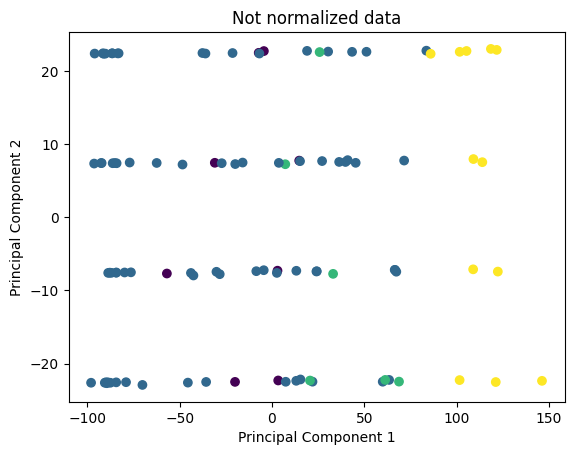

In [16]:
# now visualizing the data after applying dimensionality reduction to it not normalized

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features)

pca_2dd = pca.transform(features)

plt.scatter(pca_2dd[:100,0], pca_2dd[:100,1],c = target[:100])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Not normalized data")


Text(0.5, 1.0, 'Not normalized data')

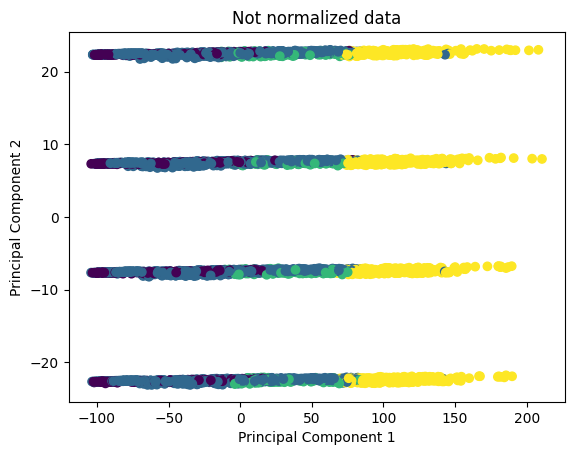

In [17]:
plt.scatter(pca_2dd[:,0], pca_2dd[:,1],c = target[:,])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Not normalized data")

Next step is data normalization. I will apply several normalization techniques and at the end decide which produced the best result.

In [18]:
from sklearn import preprocessing
# normalizing using minimax

scaler = preprocessing.MinMaxScaler()
s = scaler.fit_transform(features)

features_first_normalization = pd.DataFrame(s, columns=features.columns)
features_first_normalization

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute,AM/PM
0,0.300000,0.166667,0.045714,0.028571,0.04,0.400000,0.077519,0.000000,0.000000,0.0
1,0.300000,0.166667,0.051429,0.014286,0.02,0.600000,0.120155,0.000000,0.333333,0.0
2,0.300000,0.166667,0.028571,0.028571,0.04,0.533333,0.096899,0.000000,0.666667,0.0
3,0.300000,0.166667,0.028571,0.028571,0.04,0.600000,0.112403,0.000000,1.000000,0.0
4,0.300000,0.166667,0.034286,0.028571,0.02,0.566667,0.104651,0.043478,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
5947,0.266667,0.500000,0.062857,0.042857,0.02,0.600000,0.135659,0.956522,1.000000,1.0
5948,0.266667,0.500000,0.034286,0.000000,0.02,0.500000,0.081395,1.000000,0.000000,1.0
5949,0.266667,0.500000,0.057143,0.057143,0.02,0.416667,0.093023,1.000000,0.333333,1.0
5950,0.266667,0.500000,0.062857,0.071429,0.00,0.450000,0.104651,1.000000,0.666667,1.0


Text(0.5, 1.0, 'Normalized using MinMax')

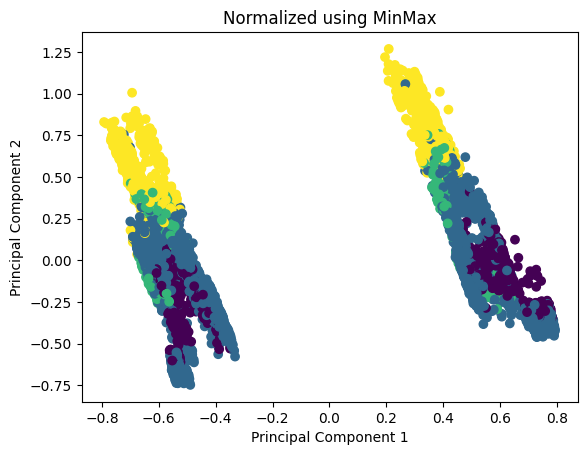

In [19]:
# now visualizing the data after applying dimensionality reduction to it

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features_first_normalization)

pca_2d = pca.transform(features_first_normalization)

plt.scatter(pca_2d[:,0], pca_2d[:,1],c = target[:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Normalized using MinMax")


In [20]:
# normalizing using z-score

scaler = preprocessing.StandardScaler()
s = scaler.fit_transform(features)

features_second_normalization = pd.DataFrame(s, columns=features.columns)
features_second_normalization


,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Hour,Minute,AM/PM
0,-0.670820,-0.980884,-1.171975,-0.880773,-0.873269,0.487929,-1.217351,-1.661325,-1.341641,-1.0
1,-0.670820,-0.980884,-1.149626,-0.967451,-0.953290,1.581600,-1.020893,-1.661325,-0.447214,-1.0
2,-0.670820,-0.980884,-1.239021,-0.880773,-0.873269,1.217043,-1.128052,-1.661325,0.447214,-1.0
3,-0.670820,-0.980884,-1.239021,-0.880773,-0.873269,1.581600,-1.056613,-1.661325,1.341641,-1.0
4,-0.670820,-0.980884,-1.216672,-0.880773,-0.953290,1.399322,-1.092333,-1.516862,-1.341641,-1.0
...,...,...,...,...,...,...,...,...,...,...
5947,-0.782624,0.049875,-1.104929,-0.794095,-0.953290,1.581600,-0.949454,1.516862,1.341641,1.0
5948,-0.782624,0.049875,-1.216672,-1.054129,-0.953290,1.034765,-1.199492,1.661325,-1.341641,1.0
5949,-0.782624,0.049875,-1.127278,-0.707418,-0.953290,0.579068,-1.145912,1.661325,-0.447214,1.0
5950,-0.782624,0.049875,-1.104929,-0.620740,-1.033312,0.761347,-1.092333,1.661325,0.447214,1.0


Text(0.5, 1.0, 'Normalized using Z-score')

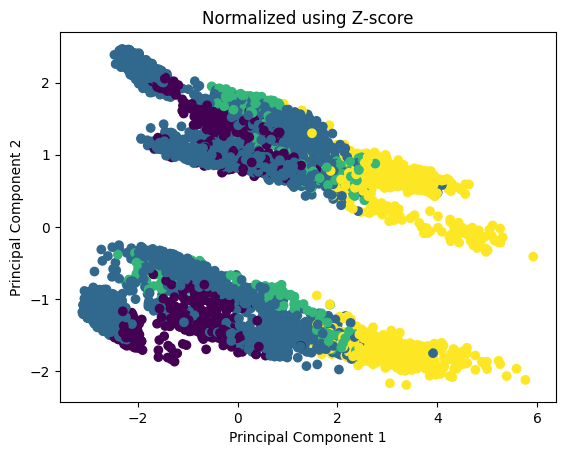

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(features_second_normalization)

pca_2d = pca.transform(features_second_normalization)

plt.scatter(pca_2d[:,0], pca_2d[:,1],c = target[:])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Normalized using Z-score")


After normalizing the data, I am going to apply the SVM algorithm to each of the normalized data in order to compare the results. 

In [22]:
# FOR THE FIRST NORMALIZED DATA(using MinMaxScaling)

from sklearn import svm
from sklearn.model_selection import train_test_split


model = svm.SVC(kernel='rbf')
# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)

In [23]:
# now evaluating the performance
from sklearn.metrics import classification_report, confusion_matrix

print("RBF kernel on MinMaxScaling normalized data, 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on MinMaxScaling normalized data, 60% training data 


[[ 251   73    0    0]
 [  16 1405    4   26]
 [   0   80   43   30]
 [   0   10    1  442]]

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       324
           1       0.90      0.97      0.93      1451
           2       0.90      0.28      0.43       153
           3       0.89      0.98      0.93       453

    accuracy                           0.90      2381
   macro avg       0.90      0.75      0.78      2381
weighted avg       0.90      0.90      0.89      2381



In [24]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on MinMaxScaling normalized data, 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on MinMaxScaling normalized data, 70% training data 


[[ 186   31    0    0]
 [  11 1060    4   14]
 [   0   65   34   22]
 [   0    4    2  353]]

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       217
           1       0.91      0.97      0.94      1089
           2       0.85      0.28      0.42       121
           3       0.91      0.98      0.94       359

    accuracy                           0.91      1786
   macro avg       0.90      0.77      0.80      1786
weighted avg       0.91      0.91      0.90      1786



In [25]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on MinMaxScaling normalized data, 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on MinMaxScaling normalized data, 80% training data 


[[122  26   0   0]
 [  8 693   7   8]
 [  0  37  23  17]
 [  0   7   0 243]]

              precision    recall  f1-score   support

           0       0.94      0.82      0.88       148
           1       0.91      0.97      0.94       716
           2       0.77      0.30      0.43        77
           3       0.91      0.97      0.94       250

    accuracy                           0.91      1191
   macro avg       0.88      0.77      0.80      1191
weighted avg       0.90      0.91      0.90      1191



In [26]:
# applying the same steps but with a different kernel

# using linear kernel

model = svm.SVC(kernel='linear')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.4)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on MinMaxScaling normalized data, 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))


Linear kernel on MinMaxScaling normalized data, 60% training data 


[[ 231  112    0    0]
 [  34 1377   14   19]
 [   0   73   50   27]
 [   0    5    1  438]]

              precision    recall  f1-score   support

           0       0.87      0.67      0.76       343
           1       0.88      0.95      0.91      1444
           2       0.77      0.33      0.47       150
           3       0.90      0.99      0.94       444

    accuracy                           0.88      2381
   macro avg       0.86      0.74      0.77      2381
weighted avg       0.88      0.88      0.87      2381



In [27]:
# now I am splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on MinMaxScaling normalized data, 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Linear kernel on MinMaxScaling normalized data, 70% training data 


[[ 171   83    0    0]
 [  41 1033   15   15]
 [   0   57   36   15]
 [   0    3    0  317]]

              precision    recall  f1-score   support

           0       0.81      0.67      0.73       254
           1       0.88      0.94      0.91      1104
           2       0.71      0.33      0.45       108
           3       0.91      0.99      0.95       320

    accuracy                           0.87      1786
   macro avg       0.83      0.73      0.76      1786
weighted avg       0.86      0.87      0.86      1786



In [28]:
# now I am splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on MinMaxScaling normalized data, 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Linear kernel on MinMaxScaling normalized data, 80% training data 


[[ 97  64   0   0]
 [ 14 720   9   4]
 [  0  30  30  16]
 [  0   3   0 204]]

              precision    recall  f1-score   support

           0       0.87      0.60      0.71       161
           1       0.88      0.96      0.92       747
           2       0.77      0.39      0.52        76
           3       0.91      0.99      0.95       207

    accuracy                           0.88      1191
   macro avg       0.86      0.74      0.78      1191
weighted avg       0.88      0.88      0.87      1191



In [29]:
# applying the same steps but with a different kernel

# using polynomial kernel

model = svm.SVC(kernel='poly')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.4)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on MinMaxScaling normalized data, 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))


Polynomial kernel on MinMaxScaling normalized data, 60% training data 


[[ 277   57    0    0]
 [  38 1406   23   10]
 [   0   47   89    6]
 [   0    5    2  421]]

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       334
           1       0.93      0.95      0.94      1477
           2       0.78      0.63      0.70       142
           3       0.96      0.98      0.97       428

    accuracy                           0.92      2381
   macro avg       0.89      0.85      0.87      2381
weighted avg       0.92      0.92      0.92      2381



In [30]:
# now I am splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on MinMaxScaling normalized data, 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on MinMaxScaling normalized data, 70% training data 


[[ 222   36    0    0]
 [  28 1038   14    5]
 [   0   40   75    2]
 [   0    5    0  321]]

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       258
           1       0.93      0.96      0.94      1085
           2       0.84      0.64      0.73       117
           3       0.98      0.98      0.98       326

    accuracy                           0.93      1786
   macro avg       0.91      0.86      0.88      1786
weighted avg       0.93      0.93      0.93      1786



In [31]:
# now I am splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on MinMaxScaling normalized data, 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on MinMaxScaling normalized data, 80% training data 


[[133  24   0   1]
 [ 25 676  11   3]
 [  0  18  43   0]
 [  0   7   3 247]]

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       158
           1       0.93      0.95      0.94       715
           2       0.75      0.70      0.73        61
           3       0.98      0.96      0.97       257

    accuracy                           0.92      1191
   macro avg       0.88      0.86      0.87      1191
weighted avg       0.92      0.92      0.92      1191



In [32]:
# applying the same steps but with a different kernel

# using sigmoid kernel

model = svm.SVC(kernel='sigmoid')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.4)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid kernel on MinMaxScaling normalized data, 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))


Sigmoid kernel on MinMaxScaling normalized data, 60% training data 


[[ 53  93   0 153]
 [362 780   0 328]
 [ 52  62   0  22]
 [205 161   0 110]]

              precision    recall  f1-score   support

           0       0.08      0.18      0.11       299
           1       0.71      0.53      0.61      1470
           2       0.00      0.00      0.00       136
           3       0.18      0.23      0.20       476

    accuracy                           0.40      2381
   macro avg       0.24      0.23      0.23      2381
weighted avg       0.49      0.40      0.43      2381



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [33]:
# now I am splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid kernel on MinMaxScaling normalized data, 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid kernel on MinMaxScaling normalized data, 70% training data 


[[ 41  88   0 133]
 [222 591   0 271]
 [ 33  57   0  22]
 [130 134   0  64]]

              precision    recall  f1-score   support

           0       0.10      0.16      0.12       262
           1       0.68      0.55      0.60      1084
           2       0.00      0.00      0.00       112
           3       0.13      0.20      0.16       328

    accuracy                           0.39      1786
   macro avg       0.23      0.22      0.22      1786
weighted avg       0.45      0.39      0.41      1786



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [34]:
# now I am splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.2)

model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid kernel on MinMaxScaling normalized data, 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid kernel on MinMaxScaling normalized data, 80% training data 


[[ 26  56   0  79]
 [141 398   0 180]
 [ 21  38   0  13]
 [114  75   0  50]]

              precision    recall  f1-score   support

           0       0.09      0.16      0.11       161
           1       0.70      0.55      0.62       719
           2       0.00      0.00      0.00        72
           3       0.16      0.21      0.18       239

    accuracy                           0.40      1191
   macro avg       0.24      0.23      0.23      1191
weighted avg       0.47      0.40      0.42      1191



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Now repeating the same steps for the data normalized with the second method(Z-Score)


In [35]:
# for Z-Score normalized data

model = svm.SVC(kernel='rbf')
# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("RBF kernel on Z-SCORE 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on Z-SCORE 60% training data 


[[ 307   37    0    0]
 [  26 1365   18   15]
 [   0   41   97   20]
 [   0    5    4  446]]

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       344
           1       0.94      0.96      0.95      1424
           2       0.82      0.61      0.70       158
           3       0.93      0.98      0.95       455

    accuracy                           0.93      2381
   macro avg       0.90      0.86      0.88      2381
weighted avg       0.93      0.93      0.93      2381



In [36]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on Z-SCORE 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on Z-SCORE 70% training data 


[[ 221   36    0    0]
 [  17 1031    9   16]
 [   0   31   72   11]
 [   0    4    4  334]]

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       257
           1       0.94      0.96      0.95      1073
           2       0.85      0.63      0.72       114
           3       0.93      0.98      0.95       342

    accuracy                           0.93      1786
   macro avg       0.91      0.86      0.88      1786
weighted avg       0.93      0.93      0.93      1786



In [37]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on Z-SCORE 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on Z-SCORE 80% training data 


[[153  20   0   0]
 [ 13 693   5   8]
 [  0  22  41  11]
 [  0   4   1 220]]

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       173
           1       0.94      0.96      0.95       719
           2       0.87      0.55      0.68        74
           3       0.92      0.98      0.95       225

    accuracy                           0.93      1191
   macro avg       0.91      0.85      0.87      1191
weighted avg       0.93      0.93      0.93      1191



In [38]:
# applying the same steps but with a different kernel

# using linear kernel

model = svm.SVC(kernel='linear')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.4)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on Z-SCORE 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))


Linear kernel on Z-SCORE 60% training data 


[[ 246   94    0    0]
 [  39 1358   37    5]
 [   0   61   71    7]
 [   0    2    1  460]]

              precision    recall  f1-score   support

           0       0.86      0.72      0.79       340
           1       0.90      0.94      0.92      1439
           2       0.65      0.51      0.57       139
           3       0.97      0.99      0.98       463

    accuracy                           0.90      2381
   macro avg       0.85      0.79      0.82      2381
weighted avg       0.89      0.90      0.89      2381



In [39]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on Z-SCORE 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Linear kernel on Z-SCORE 70% training data 


[[ 167   54    0    0]
 [  40 1019   24   10]
 [   0   56   64    2]
 [   0    4    1  345]]

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       221
           1       0.90      0.93      0.92      1093
           2       0.72      0.52      0.61       122
           3       0.97      0.99      0.98       350

    accuracy                           0.89      1786
   macro avg       0.85      0.80      0.82      1786
weighted avg       0.89      0.89      0.89      1786



In [40]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on Z-SCORE 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Linear kernel on Z-SCORE 80% training data 


[[105  52   0   0]
 [ 29 684  16   6]
 [  0  28  32   2]
 [  0   1   3 233]]

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       157
           1       0.89      0.93      0.91       735
           2       0.63      0.52      0.57        62
           3       0.97      0.98      0.97       237

    accuracy                           0.88      1191
   macro avg       0.82      0.77      0.79      1191
weighted avg       0.88      0.88      0.88      1191



In [41]:
# applying the same steps but with a different kernel

# using polynomial kernel

model = svm.SVC(kernel='poly')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.4)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on Z-SCORE 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))


Polynomial kernel on Z-SCORE 60% training data 


[[ 224  111    0    0]
 [  17 1421    5   11]
 [   0   66   69   14]
 [   0   16    8  419]]

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       335
           1       0.88      0.98      0.93      1454
           2       0.84      0.46      0.60       149
           3       0.94      0.95      0.94       443

    accuracy                           0.90      2381
   macro avg       0.90      0.76      0.81      2381
weighted avg       0.90      0.90      0.89      2381



In [42]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on Z-SCORE 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on Z-SCORE 70% training data 


[[ 176   65    0    0]
 [  18 1045    6    5]
 [   0   53   50    8]
 [   0   14    2  344]]

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       241
           1       0.89      0.97      0.93      1074
           2       0.86      0.45      0.59       111
           3       0.96      0.96      0.96       360

    accuracy                           0.90      1786
   macro avg       0.91      0.78      0.82      1786
weighted avg       0.90      0.90      0.90      1786



In [43]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on Z-SCORE 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on Z-SCORE 80% training data 


[[118  38   0   0]
 [  9 709   3   3]
 [  0  33  39   6]
 [  0  10   2 221]]

              precision    recall  f1-score   support

           0       0.93      0.76      0.83       156
           1       0.90      0.98      0.94       724
           2       0.89      0.50      0.64        78
           3       0.96      0.95      0.95       233

    accuracy                           0.91      1191
   macro avg       0.92      0.80      0.84      1191
weighted avg       0.91      0.91      0.91      1191



In [44]:
# applying the same steps but with a different kernel

# using sigmoid kernel

model = svm.SVC(kernel='sigmoid')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_first_normalization,target,test_size=0.4)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid on Z-SCORE normalized data, 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid on Z-SCORE normalized data, 60% training data 


[[ 52 105   0 159]
 [256 853   0 342]
 [ 51  67   0  31]
 [192 167   0 106]]

              precision    recall  f1-score   support

           0       0.09      0.16      0.12       316
           1       0.72      0.59      0.65      1451
           2       0.00      0.00      0.00       149
           3       0.17      0.23      0.19       465

    accuracy                           0.42      2381
   macro avg       0.24      0.25      0.24      2381
weighted avg       0.48      0.42      0.45      2381



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [45]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid on Z-SCORE normalized data, 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid on Z-SCORE normalized data, 70% training data 


[[119 138   0   0]
 [116 916  19  38]
 [  0  73  18  20]
 [  0  72  10 247]]

              precision    recall  f1-score   support

           0       0.51      0.46      0.48       257
           1       0.76      0.84      0.80      1089
           2       0.38      0.16      0.23       111
           3       0.81      0.75      0.78       329

    accuracy                           0.73      1786
   macro avg       0.62      0.55      0.57      1786
weighted avg       0.71      0.73      0.72      1786



In [46]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features_second_normalization,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid on Z-SCORE normalized data, 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid on Z-SCORE normalized data, 80% training data 


[[ 87  86   0   0]
 [ 87 588  11  34]
 [  0  37  11  14]
 [  0  49   3 184]]

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       173
           1       0.77      0.82      0.79       720
           2       0.44      0.18      0.25        62
           3       0.79      0.78      0.79       236

    accuracy                           0.73      1191
   macro avg       0.63      0.57      0.58      1191
weighted avg       0.72      0.73      0.72      1191



Applying svm on the non-normalized data for comparison

In [47]:
model = svm.SVC(kernel='rbf')
# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("RBF kernel on un-normalized 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on un-normalized 60% training data 


[[ 248   63    0    0]
 [  17 1391    1   16]
 [   0  109   49   12]
 [   0    3    1  471]]

              precision    recall  f1-score   support

           0       0.94      0.80      0.86       311
           1       0.89      0.98      0.93      1425
           2       0.96      0.29      0.44       170
           3       0.94      0.99      0.97       475

    accuracy                           0.91      2381
   macro avg       0.93      0.76      0.80      2381
weighted avg       0.91      0.91      0.89      2381



In [48]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on un-normalized 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on un-normalized 70% training data 


[[ 210   50    0    0]
 [  17 1057    3   17]
 [   0   56   48    9]
 [   0    3    0  316]]

              precision    recall  f1-score   support

           0       0.93      0.81      0.86       260
           1       0.91      0.97      0.94      1094
           2       0.94      0.42      0.59       113
           3       0.92      0.99      0.96       319

    accuracy                           0.91      1786
   macro avg       0.92      0.80      0.83      1786
weighted avg       0.91      0.91      0.91      1786



In [49]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on un-normalized 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on un-normalized 80% training data 


[[142  27   0   0]
 [  9 693   2   5]
 [  0  37  25   9]
 [  0   0   0 242]]

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       169
           1       0.92      0.98      0.95       709
           2       0.93      0.35      0.51        71
           3       0.95      1.00      0.97       242

    accuracy                           0.93      1191
   macro avg       0.93      0.79      0.83      1191
weighted avg       0.93      0.93      0.92      1191



In [50]:
# applying the same steps but with a different kernel

# using linear kernel

model = svm.SVC(kernel='linear')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("Linear kernel on un-normalized 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))


Linear kernel on un-normalized 60% training data 


[[ 242   97    0    0]
 [  52 1346   26    8]
 [   0   61   76    0]
 [   1    4    0  468]]

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       339
           1       0.89      0.94      0.92      1432
           2       0.75      0.55      0.64       137
           3       0.98      0.99      0.99       473

    accuracy                           0.90      2381
   macro avg       0.86      0.80      0.83      2381
weighted avg       0.89      0.90      0.89      2381



In [51]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on un-normalized 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Linear kernel on un-normalized 70% training data 


[[ 168   78    0    0]
 [  30 1019   22    5]
 [   0   51   50    0]
 [   0    2    0  361]]

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       246
           1       0.89      0.95      0.92      1076
           2       0.69      0.50      0.58       101
           3       0.99      0.99      0.99       363

    accuracy                           0.89      1786
   macro avg       0.85      0.78      0.81      1786
weighted avg       0.89      0.89      0.89      1786



In [52]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on un-normalized 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Linear kernel on un-normalized 80% training data 


[[102  46   0   0]
 [ 27 702  16   1]
 [  0  40  33   0]
 [  0   0   0 224]]

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       148
           1       0.89      0.94      0.92       746
           2       0.67      0.45      0.54        73
           3       1.00      1.00      1.00       224

    accuracy                           0.89      1191
   macro avg       0.84      0.77      0.80      1191
weighted avg       0.88      0.89      0.89      1191



In [53]:
# applying the same steps but with a different kernel

# using polynomial kernel

model = svm.SVC(kernel='poly')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("Polynomial kernel on un-normalized 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on un-normalized 60% training data 


[[   2  327    0    0]
 [   2 1410    9    9]
 [   0   68   81    6]
 [   0    2    3  462]]

              precision    recall  f1-score   support

           0       0.50      0.01      0.01       329
           1       0.78      0.99      0.87      1430
           2       0.87      0.52      0.65       155
           3       0.97      0.99      0.98       467

    accuracy                           0.82      2381
   macro avg       0.78      0.63      0.63      2381
weighted avg       0.78      0.82      0.76      2381



In [54]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on un-normalized 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on un-normalized 70% training data 


[[   0  273    0    0]
 [   0 1076   15    4]
 [   0   36   51    3]
 [   0    2    1  325]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       273
           1       0.78      0.98      0.87      1095
           2       0.76      0.57      0.65        90
           3       0.98      0.99      0.98       328

    accuracy                           0.81      1786
   macro avg       0.63      0.64      0.63      1786
weighted avg       0.69      0.81      0.75      1786



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [55]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on un-normalized 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Polynomial kernel on un-normalized 80% training data 


[[  1 185   0   0]
 [  0 697  18   3]
 [  0  30  33   0]
 [  0   0   0 224]]

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       186
           1       0.76      0.97      0.86       718
           2       0.65      0.52      0.58        63
           3       0.99      1.00      0.99       224

    accuracy                           0.80      1191
   macro avg       0.85      0.62      0.61      1191
weighted avg       0.84      0.80      0.73      1191



In [56]:
# applying the same steps but with a different kernel

# using sigmoid kernel

model = svm.SVC(kernel='sigmoid')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("Sigmoid kernel on un-normalized 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid kernel on un-normalized 60% training data 


[[ 44  81   0 223]
 [285 704   0 442]
 [ 63  80   0   2]
 [457   0   0   0]]

              precision    recall  f1-score   support

           0       0.05      0.13      0.07       348
           1       0.81      0.49      0.61      1431
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00       457

    accuracy                           0.31      2381
   macro avg       0.22      0.15      0.17      2381
weighted avg       0.50      0.31      0.38      2381



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [57]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid kernel on un-normalized 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid kernel on un-normalized 70% training data 


[[ 31  61   0 149]
 [207 526   0 365]
 [ 42  73   0   2]
 [330   0   0   0]]

              precision    recall  f1-score   support

           0       0.05      0.13      0.07       241
           1       0.80      0.48      0.60      1098
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00       330

    accuracy                           0.31      1786
   macro avg       0.21      0.15      0.17      1786
weighted avg       0.50      0.31      0.38      1786



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [58]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(features,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid kernel on un-normalized 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

Sigmoid kernel on un-normalized 80% training data 


[[ 18  41   0 112]
 [143 372   0 199]
 [ 30  36   0   2]
 [238   0   0   0]]

              precision    recall  f1-score   support

           0       0.04      0.11      0.06       171
           1       0.83      0.52      0.64       714
           2       0.00      0.00      0.00        68
           3       0.00      0.00      0.00       238

    accuracy                           0.33      1191
   macro avg       0.22      0.16      0.17      1191
weighted avg       0.50      0.33      0.39      1191



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Now i am applying all four types of kernel to the data that have undergone dimensionality reduction

In [59]:
model = svm.SVC(kernel='rbf')
# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("RBF kernel on pca data 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on pca data 60% training data 


[[   0  320    0    2]
 [   0 1427    0   20]
 [   0  149    0    5]
 [   0    9    0  449]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       322
           1       0.75      0.99      0.85      1447
           2       0.00      0.00      0.00       154
           3       0.94      0.98      0.96       458

    accuracy                           0.79      2381
   macro avg       0.42      0.49      0.45      2381
weighted avg       0.64      0.79      0.70      2381



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [60]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on pca 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on pca 70% training data 


[[   0  275    0    0]
 [   0 1032    0   12]
 [   0  109    0    2]
 [   0   12    0  344]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       275
           1       0.72      0.99      0.83      1044
           2       0.00      0.00      0.00       111
           3       0.96      0.97      0.96       356

    accuracy                           0.77      1786
   macro avg       0.42      0.49      0.45      1786
weighted avg       0.61      0.77      0.68      1786



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [61]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("RBF kernel on pca 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

RBF kernel on pca 80% training data 


[[  0 170   0   0]
 [  0 705   0  11]
 [  0  69   0   3]
 [  0   5   0 228]]

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.74      0.98      0.85       716
           2       0.00      0.00      0.00        72
           3       0.94      0.98      0.96       233

    accuracy                           0.78      1191
   macro avg       0.42      0.49      0.45      1191
weighted avg       0.63      0.78      0.70      1191



/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ilvicumani/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [62]:
# applying the same steps but with a different kernel

# using linear kernel

model = svm.SVC(kernel='linear')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("Linear kernel on pca 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on pca 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Linear kernel on pca 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# applying the same steps but with a different kernel

# using polynomial kernel

model = svm.SVC(kernel='poly')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("Polynomial kernel on pca 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on pca 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on pca 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# applying the same steps but with a different kernel

# using sigmoid kernel

model = svm.SVC(kernel='sigmoid')

# first I am splitting the data into 60% training and 40% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.4)
model.fit(x_train,y_train)
predicted_labels = model.predict(x_test)
print("Sigmoid kernel on pca 60% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# now splitting the data into 70% training and 30% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.3)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Sigmoid kernel on pca 70% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))

In [ ]:
# now splitting the data into 80% training and 20% testing
[x_train,x_test,y_train,y_test] = train_test_split(pca_2dd,target,test_size=0.2)
model.fit(x_train,y_train)

predicted_labels = model.predict(x_test)
print("Polynomial kernel on pca 80% training data \n\n")
print(confusion_matrix(y_test, predicted_labels), end='\n\n')
print(classification_report(y_test, predicted_labels))